In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data snapshot
cancer_df = pd.read_csv('./data/cervical.csv')
cancer_df.head(5)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [3]:
# update column name
cancer_df.columns = ['age','num_of_sex_partners','first_sex','num_of_pregn'\
    ,'smokes','smokes_yrs','hormonal_contrpt','hormonal_contrpt_yrs','iud'\
    ,'iud_yrs','stds','stds_num','stds_num_diagn','stds_time_since_1diagn'\
    ,'stds_time_since_ldiagn','biopsy']
cancer_df.shape

(858, 16)

In [4]:
# data summary
cancer_df.describe()

,age,num_of_sex_partners,first_sex,num_of_pregn,smokes,smokes_yrs,hormonal_contrpt,hormonal_contrpt_yrs,iud,iud_yrs,stds,stds_num,stds_num_diagn,stds_time_since_1diagn,stds_time_since_ldiagn
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.686480,1.972394,0.096737,0.444604,0.092075,0.155012,0.087413,1.425408,1.398601
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,0.464194,3.597888,0.295771,1.814218,0.289300,0.529617,0.302545,2.201550,2.113931
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,3.000000,22.000000,22.000000


In [5]:
# data dtype
cancer_df.dtypes

age                         int64
num_of_sex_partners         int64
first_sex                   int64
num_of_pregn                int64
smokes                      int64
smokes_yrs                float64
hormonal_contrpt            int64
hormonal_contrpt_yrs      float64
iud                         int64
iud_yrs                   float64
stds                        int64
stds_num                    int64
stds_num_diagn              int64
stds_time_since_1diagn      int64
stds_time_since_ldiagn      int64
biopsy                     object
dtype: object

In [6]:
# check nulls
cancer_df.isnull().sum()

age                       0
num_of_sex_partners       0
first_sex                 0
num_of_pregn              0
smokes                    0
smokes_yrs                0
hormonal_contrpt          0
hormonal_contrpt_yrs      0
iud                       0
iud_yrs                   0
stds                      0
stds_num                  0
stds_num_diagn            0
stds_time_since_1diagn    0
stds_time_since_ldiagn    0
biopsy                    0
dtype: int64

</h3><b>EDA starts here</b></h3>

In [7]:
import seaborn as sns
sns.set_theme(style='whitegrid', palette='pastel')

In [8]:
# organise our columns into different category
cols_cat = {
    'num':['age','num_of_sex_partners','first_sex','num_of_pregn','smokes_yrs','hormonal_contrpt_yrs','iud_yrs','stds_time_since_1diagn','stds_time_since_ldiagn']\
    ,'ordinal':['smokes','hormonal_contrpt','iud','stds','stds_num','stds_num_diagn']\
    ,'cat':[]
    ,'resp':['resp']
}

<h5>Imbalanced data</h5>
<p>We have 6% of observations having cancer while the rest are not. The distribution tells us that it's an imbalanced data.</p>

In [9]:
# response distribution
cancer_df['resp'] = cancer_df['biopsy'].apply(lambda x: 1 if x=='Cancer' else 0)
resp_dist = cancer_df.groupby('biopsy').agg({'resp':len}).reset_index(drop=False)
resp_dist['pct'] = resp_dist['resp'] / resp_dist['resp'].sum()
print(resp_dist)

    biopsy  resp       pct
0   Cancer    55  0.064103
1  Healthy   803  0.935897


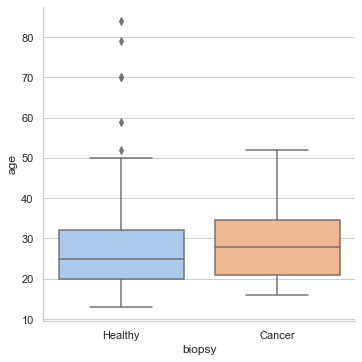

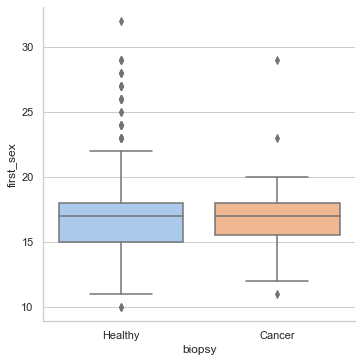

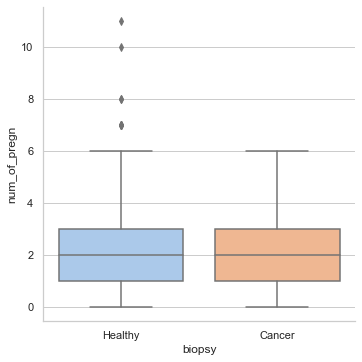

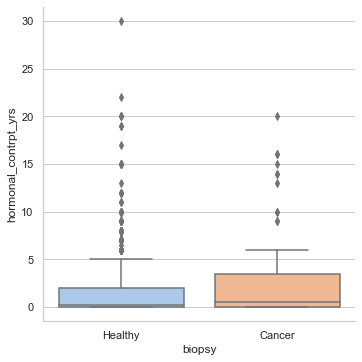

In [10]:
# bi-variate analysis - boxplot against responses
# boxplot applies to data that are not very sparse
for col in ['age','first_sex','num_of_pregn','hormonal_contrpt_yrs']:
    sns.catplot(x='biopsy', y=col, kind='box',data=cancer_df)

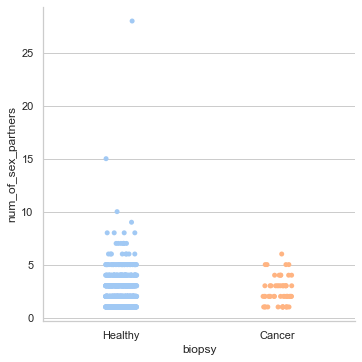

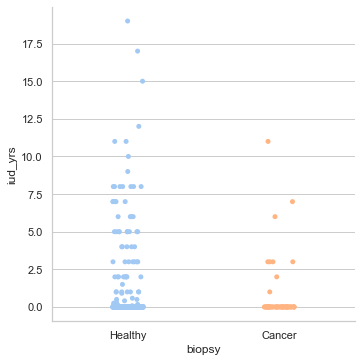

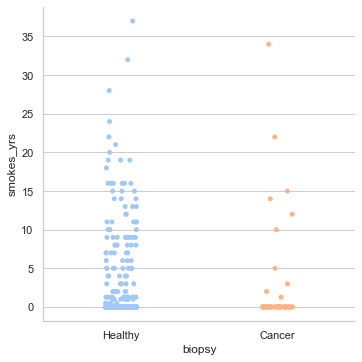

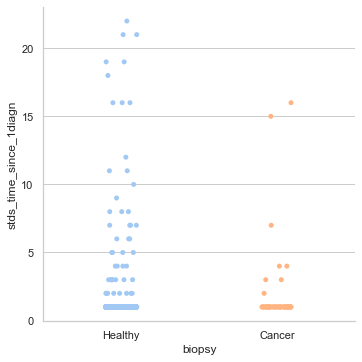

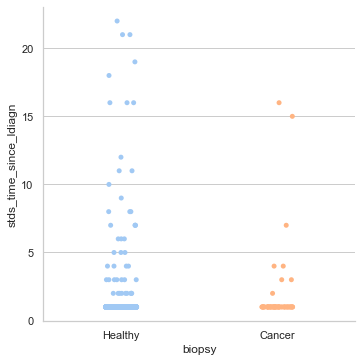

In [11]:
# scatter plot / strip plot
# reference: https://www.educative.io/edpresso/what-is-seabornstripplot
# scatter plot against responses works well on sparse numerical data
# it is default option for sns.catplot
for col in ['num_of_sex_partners','iud_yrs','smokes_yrs','stds_time_since_1diagn','stds_time_since_ldiagn']:
    sns.catplot(x='biopsy',y=col,jitter=True,data=cancer_df) # jitter controls the magnitutde of dots grouped


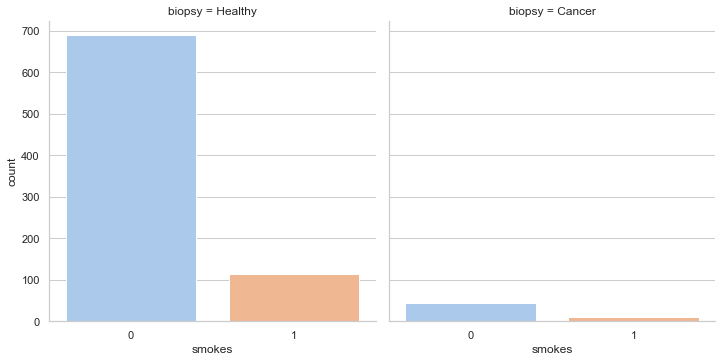

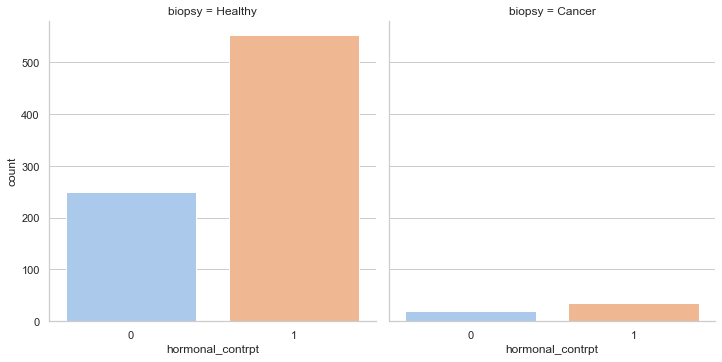

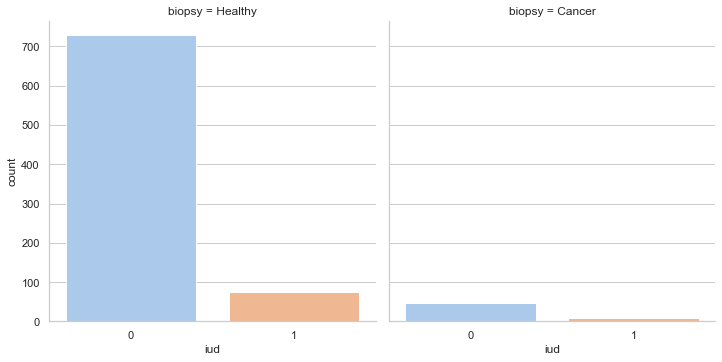

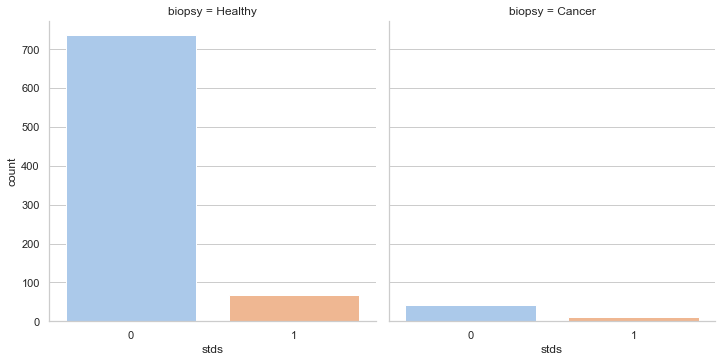

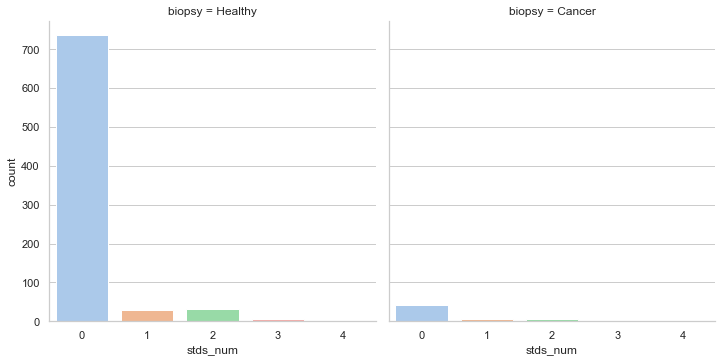

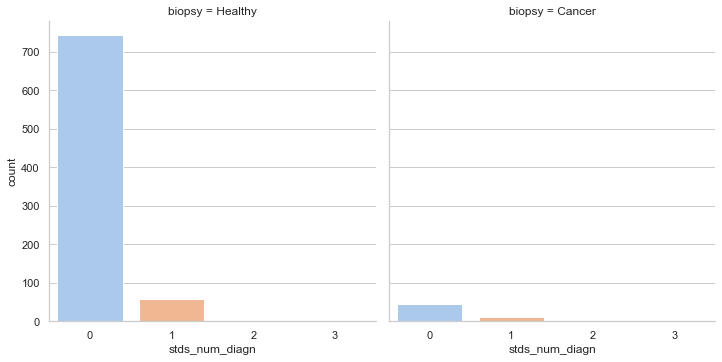

In [12]:
# ordinal data via countplot 
# our purpose is to show for the Healthy and Cancer group
# what's the data count for each ordinal column
# reference: https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
for col in cols_cat.get('ordinal'):
    sns.catplot(x=col, col='biopsy', kind='count',data=cancer_df)

<AxesSubplot:>

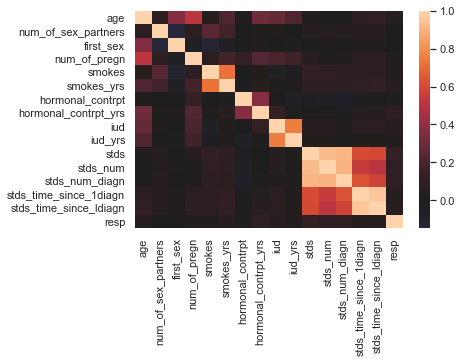

In [13]:
# correlation between variables - will help decide whether to use logistic regression or not. 
# logistic regression assumes low multicolinearity
temp_cols = cancer_df.columns.to_list()
temp_cols.remove('biopsy')
sns.heatmap(cancer_df[temp_cols].corr(),center=0)

<h3>Modelling</h3>
<p>We want to experiment Logistic Regression as the baseline, Boost Tree (Goss). Comparing to random forest will lead us to a better model for this problem.</p>
<p><b>consideration 1: </b>based on previous EDA piece, we found that features are not really normally distributed. Hence Naive Bayes wouldn't be a good algorithm for us. </p>
<p><b>consideration 2: </b>given that labels' distribution is imbalanced, we need to adjust class weights. <u>We want to penalise the misclassification made by minority class by setting a higher class weight and reducing weight for the majority class</u>
    <ul>
        <li><a href="https://towardsdatascience.com/class-weights-for-categorical-loss-1a4c79818c2d">Reference 1 - class weights derivative</a></li>
        <li><a href="https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b">Reference 2 - class weights grid search</a></li>
        <li><a href="https://web.stanford.edu/~jurafsky/slp3/5.pdf">Reference 3 - logistic regression</a></li>
    </ul>
</p>
<p><b>consideration 3: </b>LogisticRegression prefer normalised data when apply gradient descent.</p>

In [27]:
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lightgbm import LGBMClassifier, plot_importance,plot_metric
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from lib.ml_helper import plot_learning_curve, calc_metrics
from sklearn.metrics import make_scorer, mean_absolute_error, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score,roc_auc_score, roc_curve

In [15]:
# tranforming numerical columns
# and adding back to cancer_df
std_cols = [c + "_std" for c in cols_cat.get('num')]
x_scaler = MinMaxScaler().fit(cancer_df[cols_cat.get('num')].to_numpy())
scaler_df = pd.DataFrame(x_scaler.transform(cancer_df[cols_cat.get('num')].to_numpy()), columns = std_cols)
cols_cat['num_std'] = std_cols
cancer_df = pd.concat([cancer_df, scaler_df], axis=1)

In [16]:
# train and test split
split_state = 25
feature_cols = cols_cat.get("num_std") + cols_cat.get('ordinal')
X_train, X_test, y_train, y_test = train_test_split(cancer_df[feature_cols].to_numpy(), cancer_df['resp'].to_numpy(), random_state=split_state, test_size=0.2)
print(f"""details of data:
holdout group size {len(X_test)}, {np.round(len(X_test)/len(cancer_df),2) * 100}% 
and train/test group size {len(X_train)}, {np.round(len(X_train)/len(cancer_df),2) * 100}%
""")

details of data:
holdout group size 172, 20.0% 
and train/test group size 686, 80.0%



In [17]:
# set up class weight
minority_rec = 55
majority_rec = 803
total_rec = minority_rec + majority_rec
adj_class_weight = {1:0.5 * total_rec / minority_rec , 0:0.5 * total_rec / majority_rec}
print(adj_class_weight)

{1: 7.8, 0: 0.5342465753424658}


<h5>Logistic Regression Training</h5>
<p>We will include</p>
<ul>
    <li>Grid Search Cross Validation on best parameters for class weight and L2 regularisation</li>
    <li>Calculate Feature Importance for Logistic Regression</li>
</ul>

In [18]:
# train model - logistic regression
# how to use make scorer, https://scikit-learn.org/stable/modules/model_evaluation.html
custom_scoring = make_scorer(f1_score, greater_is_better=True)
logistic_params = {
    "class_weight":[{1:15,0:1}, adj_class_weight, {1:7,0:1}, {1:3,0:1}]\
    , 'C':[0.001, 0.01, 0.1, 1]
}
grid_logistic_reg = GridSearchCV(
    estimator = LogisticRegression(random_state=25
        , solver='liblinear'
        , max_iter=200
        , tol=1e-5
        , fit_intercept=1) # define our algorithm
    , param_grid = logistic_params  # define the metrics for searching
    , scoring = custom_scoring   # define the evaluation metrics
    , verbose=0
)
grid_logistic_reg.fit(X_train, y_train)
logistic_reg = grid_logistic_reg.best_estimator_
# export parameters
print('model parameters')
for k,v in logistic_reg.get_params().items():
    print(f"{k}:{v}")
print('evaliation')
print("training, " + str(calc_metrics(logistic_reg, X_train, y_train)))
print("testing, " + str(calc_metrics(logistic_reg, X_test, y_test)))

model parameters
C:0.1
class_weight:{1: 7.8, 0: 0.5342465753424658}
dual:False
fit_intercept:1
intercept_scaling:1
l1_ratio:None
max_iter:200
multi_class:auto
n_jobs:None
penalty:l2
random_state:25
solver:liblinear
tol:1e-05
verbose:0
warm_start:False
evaliation
training, {'accuracy': 0.8323615160349854, 'precision': 0.18584070796460178, 'recall': 0.4772727272727273, 'f1_score': 0.267515923566879}
testing, {'accuracy': 0.813953488372093, 'precision': 0.13793103448275862, 'recall': 0.36363636363636365, 'f1_score': 0.2}


<h5>Intepretation of logistic regresion coefficient</h5>
<p><b>Odd ratio - </b>Odds is the ratio between P(Y=1) and P(Y=0), and it represents the relativity between the two probability. When it is 1, it means it's equal chances, vice verse.</p>
<p><b>Feature importance - </b>when a feature X increases by 1 unit, the odd ratio of (X+1) against the odd ratio is exp(coef). Hence, we can use exp(coef) as our feature importance, since the bigger the number is, the more it times to the odd ratio under the same increase. Anything above 1 is positive factors and below 1 would be negative factors</p>

<AxesSubplot:xlabel='lg_imp', ylabel='lg_cols'>

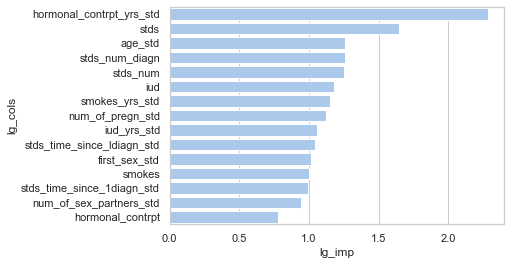

In [19]:
# export feature importance
#
feature_importance = pd.DataFrame(pd.Series(logistic_reg.coef_.reshape(-1),name='lg_coef'))
feature_importance['lg_imp'] = feature_importance.lg_coef.apply(lambda x: math.pow(math.e, x))
feature_importance['lg_cols'] = feature_cols
sns.barplot(x="lg_imp", y="lg_cols", data=feature_importance\
    .sort_values(by='lg_imp',ascending=False), color="b")

<h5>Boost Tree Training</h5>
<p>We will include</p>
<ul>
    <li>Grid Search Cross Validation on best parameters for class weight and L2 regularisation</li>
    <li>Calculate Feature Importance</li>
</ul>
<p>References</p>
<ul>
<li><a href="https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier.fit">LightGBM Classifier Document</a></li>
<li><a href="https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html">LightGBM Parameter Tuning</a></li>
<li><a href='https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python/notebook'>Fine tuning LightGBM and dealing with Overfitting</a></li>
</ul>

In [20]:
import warnings
warnings.simplefilter(action='ignore')

custom_scoring = make_scorer(precision_score, greater_is_better=True)
#y_train_label = np.array(['Healthy' if item == 0 else 'Cancer' for item in y_train])
gbt_params = {
    'max_depth':[3,6,9,12,15]
    , 'learning_rate':[0.005, 0.01, 0.05, 0.1, 0.3, 0.6, 0.9]
    , 'num_leaves':[3,5,7]
    , 'min_data_in_leaf':[90, 110, 130] # key factors to avoid over-fitting. 
}
grid_gbt = GridSearchCV(
    estimator = LGBMClassifier(random_state=25
        , boosting_type='goss'
        , objective='binary'
        , class_weight = {1: 7.8, 0: 0.534}
        , reg_alpha=0.1
        , verbose = -1
    ) # define our algorithm
    , param_grid = gbt_params  # define the metrics for searching
    , scoring = custom_scoring   # define the evaluation metrics
    , verbose = 0
)
grid_gbt.fit(X=X_train, y=y_train, feature_name = feature_cols)
gbt_reg = grid_gbt.best_estimator_

[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min

In [21]:
# export parameters
print('model parameters')
for k,v in gbt_reg.get_params().items():
    print(f"{k}:{v}")
print('evaluation')
print("training, " + str(calc_metrics(gbt_reg, X_train, y_train)))
print("testing, " + str(calc_metrics(gbt_reg, X_test, y_test)))

model parameters
boosting_type:goss
class_weight:{1: 7.8, 0: 0.534}
colsample_bytree:1.0
importance_type:split
learning_rate:0.9
max_depth:3
min_child_samples:20
min_child_weight:0.001
min_split_gain:0.0
n_estimators:100
n_jobs:-1
num_leaves:3
objective:binary
random_state:25
reg_alpha:0.1
reg_lambda:0.0
silent:True
subsample:1.0
subsample_for_bin:200000
subsample_freq:0
verbose:-1
min_data_in_leaf:90
evaluation
training, {'accuracy': 0.6909620991253644, 'precision': 0.13793103448275862, 'recall': 0.7272727272727273, 'f1_score': 0.23188405797101447}
testing, {'accuracy': 0.6918604651162791, 'precision': 0.09615384615384616, 'recall': 0.45454545454545453, 'f1_score': 0.15873015873015872}


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

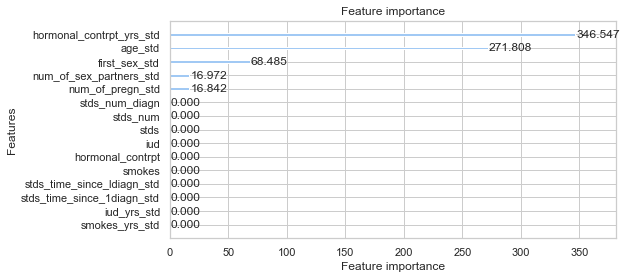

In [22]:
# plot feature importance
plot_importance(gbt_reg, importance_type='gain', max_num_features=-1, ignore_zero=False, figsize=(8,4))

<h3>Compare results / Evaluation</h3>
<p>Here're the content</p>
<ul>
    <li>Find the correlation between log loss of FP/FN and each feature per model. The aim is to find the which factor influnce our errors the most</li>
    <li>Plotting ROC-AUC curves of the two models. It shows that Gradient Boost Tree does provide a better performance.</li>
</ul>

In [23]:
# we need to understand which one predicts wrongly
# 
import math
log_loss = lambda y,p: (-1) * y * math.log(p) + (1 - y) * math.log(1 - p)
outcome_df = pd.DataFrame(
    np.hstack([
        X_train
        , y_train.reshape(-1,1)
        , logistic_reg.predict(X_train).reshape(-1,1)
        , logistic_reg.predict_proba(X_train).reshape(-1,2)
        , gbt_reg.predict(X_train).reshape(-1,1)
        , gbt_reg.predict_proba(X_train).reshape(-1,2)
    ]), columns = feature_cols + ['resp','lg_pred','lg_prob0','lg_prob1','gbt_pred','gbt_prob0','gbt_prob1'])
outcome_df['lg_prob_odd'] = outcome_df['lg_prob1'].apply(lambda x: math.log(x / (1-x)))
outcome_df['lg_diagnosis'] = outcome_df.apply(lambda x: 'True Neg' if (x.resp==x.lg_pred) & (x.resp==0)  else 'True Pos' if (x.resp==x.lg_pred) & (x.resp==1) else 'False Pos' if x.resp == 0 else 'False Neg', axis=1)
outcome_df['lg_loss'] = outcome_df.apply(lambda x: log_loss(x.resp, x.lg_prob1), axis=1) 
outcome_df['gbt_diagnosis'] = outcome_df.apply(lambda x: 'True Neg' if (x.resp==x.gbt_pred) & (x.resp==0)  else 'True Pos' if (x.resp==x.gbt_pred) & (x.resp==1) else 'False Pos' if x.resp == 0 else 'False Neg', axis=1)
outcome_df['gbt_loss'] = outcome_df.apply(lambda x: log_loss(x.resp, x.gbt_prob1), axis=1) 

model lg
False Positive


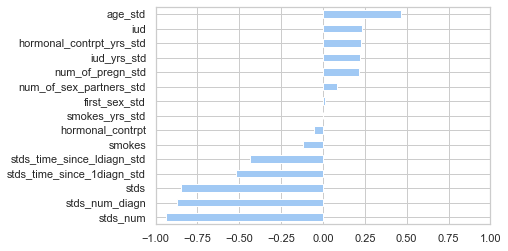

False Negative


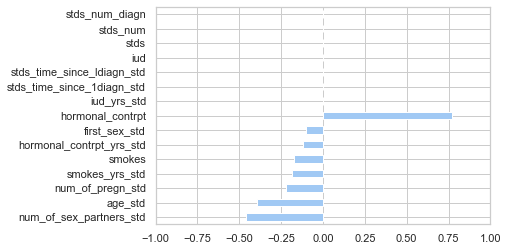

model gbt
False Positive


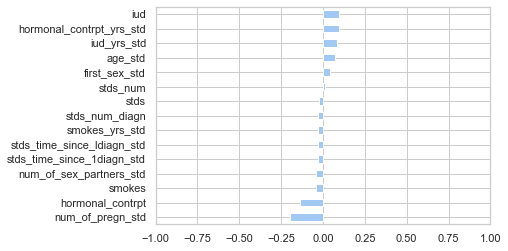

False Negative


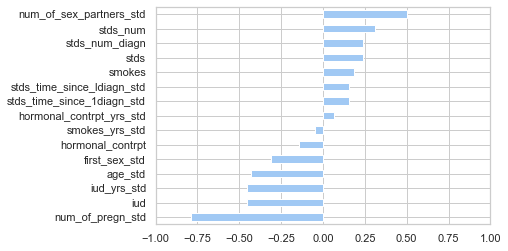

In [24]:
# with log loss each instance, we can find the correlation against our inputs and find correlation between log-loss and our inputs
for m in ['lg','gbt']:
    print(f'model {m}')
    print('False Positive')
    outcome_df.loc[outcome_df[f'{m}_diagnosis']=="False Pos"][feature_cols]\
        .corrwith(other=outcome_df[outcome_df[f'{m}_diagnosis']=="False Pos"][f'{m}_loss'], axis=0, method='pearson')\
        .sort_values().plot(kind='barh', xlim=(-1,1))
    plt.show()

    print('False Negative')
    outcome_df.loc[outcome_df[f'{m}_diagnosis']=="False Neg"][feature_cols]\
        .corrwith(other=outcome_df[outcome_df[f'{m}_diagnosis']=="False Neg"][f'{m}_loss'], axis=0, method='pearson')\
        .sort_values().plot(kind='barh', xlim=(-1,1))
    plt.show()

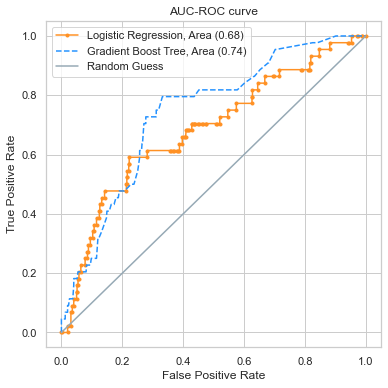

In [51]:
# plotting AUC ROC curve
lg_fpr, lg_tpr, lg_thresholds = roc_curve(outcome_df['resp'].to_numpy(), outcome_df['lg_prob1'], pos_label=1)
lg_roc_auc_score = roc_auc_score(outcome_df['resp'].to_numpy(), outcome_df['lg_prob1'])
gbt_fpr, gbt_tpr, gbt_thresholds = roc_curve(outcome_df['resp'].to_numpy(), outcome_df['gbt_prob1'], pos_label=1)
gbt_roc_auc_score = roc_auc_score(outcome_df['resp'].to_numpy(), outcome_df['gbt_prob1'])
f, ax = plt.subplots(figsize=(6,6))
ax.plot(lg_fpr, lg_tpr, '.-', color="#ff9124", label=f'Logistic Regression, Area ({np.round(lg_roc_auc_score,2)})')
ax.plot(gbt_fpr, gbt_tpr, '--', color="#2492ff", label=f'Gradient Boost Tree, Area ({np.round(gbt_roc_auc_score,2)})')
ax.plot(np.linspace(0,1,num=9), np.linspace(0,1,num=9), color='#96a9b5',label='Random Guess')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title('AUC-ROC curve')
ax.grid(True)
ax.legend(loc='best')
plt.show()